<a href="https://colab.research.google.com/github/ErikaDenisse29/ColabFiles/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  



In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🔹 Paso 1: Configuración Inicial
✅ Carga el set de datos que puedes encontrar en el campus virtual

✅ Ejecutar las celdas de importación de librerías y carga del dataset.

✅ Familiarizarse con los datos usando .head(), .info() y .describe().

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

import seaborn as sns
from scipy import stats


df = pd.read_csv('drive/MyDrive/insurance.csv')
print(df.head())
print()
print(df.describe())
print()
print(df.info())




   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data colu

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

In [47]:

df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')


print(df.dtypes)

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object


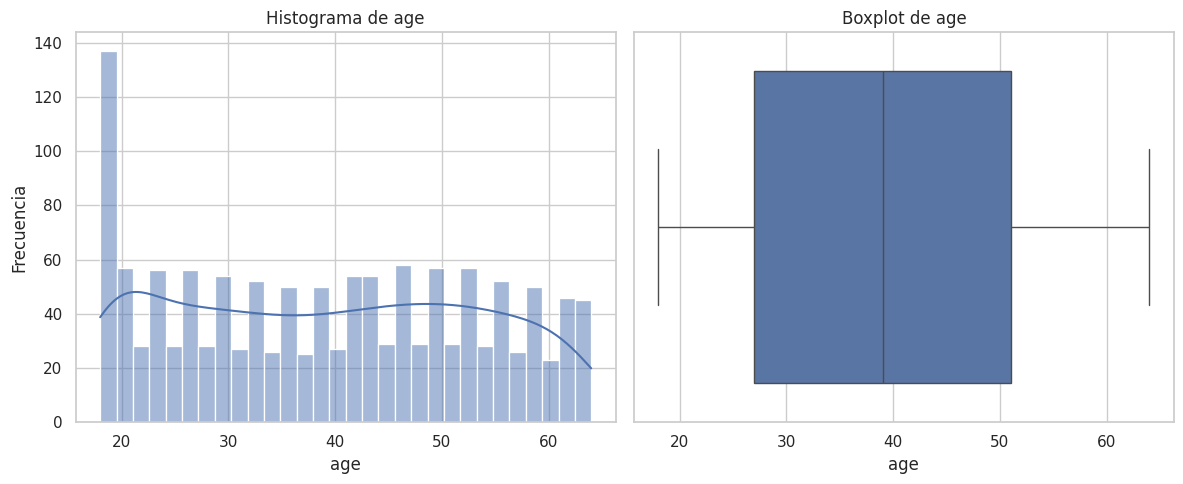

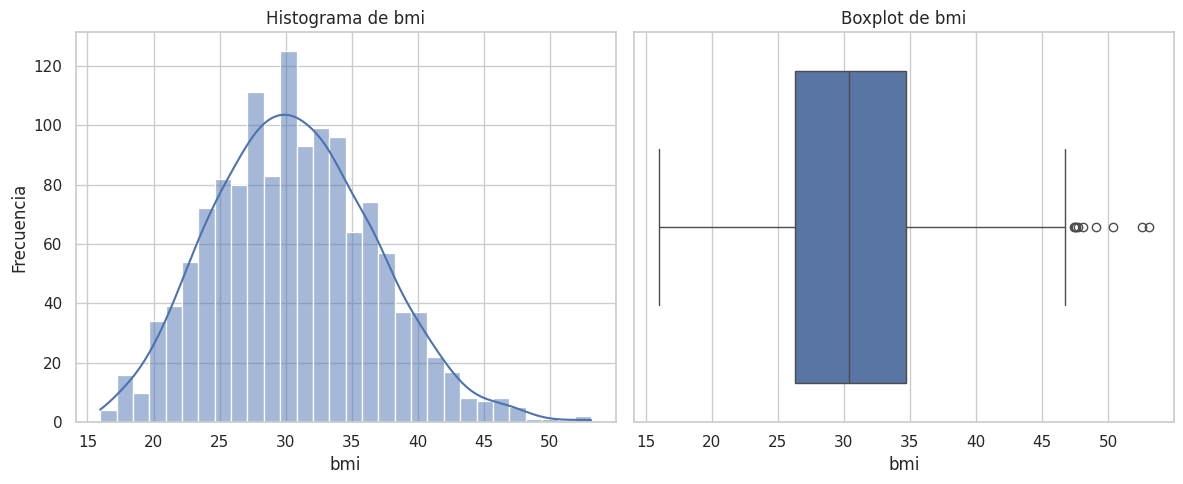

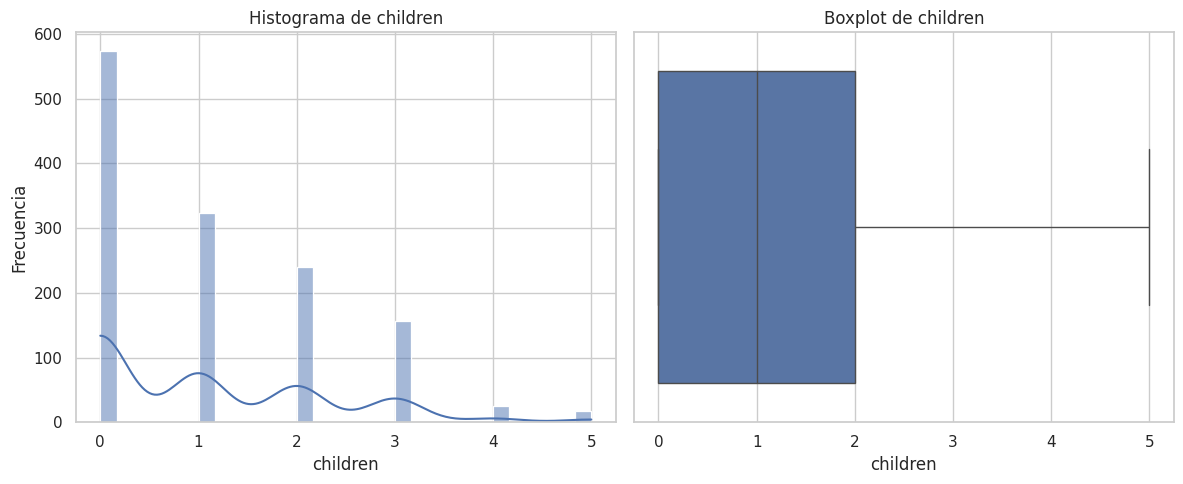

In [48]:
sns.set(style="whitegrid")

numerical_columns = ['age', 'bmi', 'children']


for column in numerical_columns:
    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')


    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')

    plt.tight_layout()
    plt.show()

In [49]:

tendencia_dispersión = df[numerical_columns].describe()

mediana = df[numerical_columns].median()


print("Medidas de Tendencia Central y Dispersión:")
print(tendencia_dispersión)
print("\nMediana:")
print(mediana)


Medidas de Tendencia Central y Dispersión:
               age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.094918
std      14.049960     6.098187     1.205493
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.000000
50%      39.000000    30.400000     1.000000
75%      51.000000    34.693750     2.000000
max      64.000000    53.130000     5.000000

Mediana:
age         39.0
bmi         30.4
children     1.0
dtype: float64


<ipython-input-50-0561bf1863cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


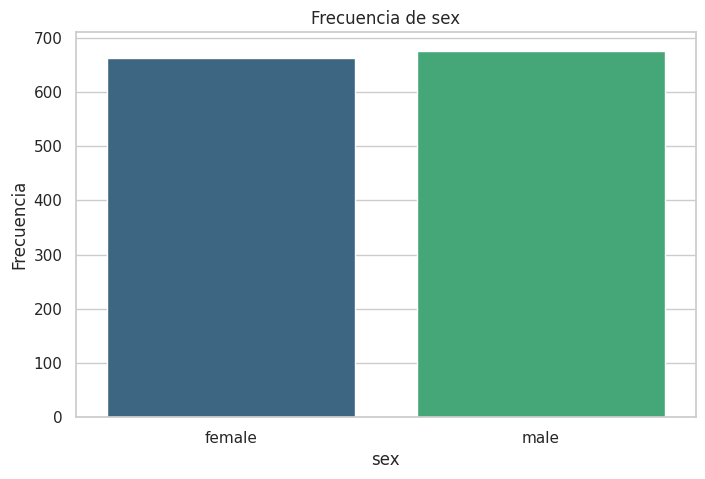

<ipython-input-50-0561bf1863cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


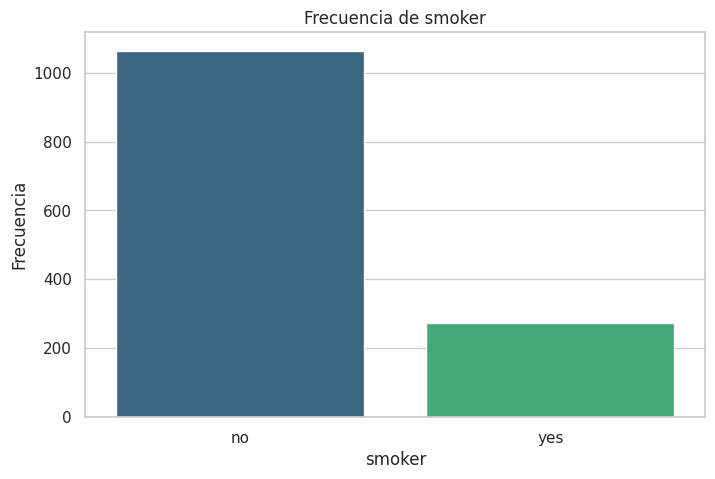

<ipython-input-50-0561bf1863cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


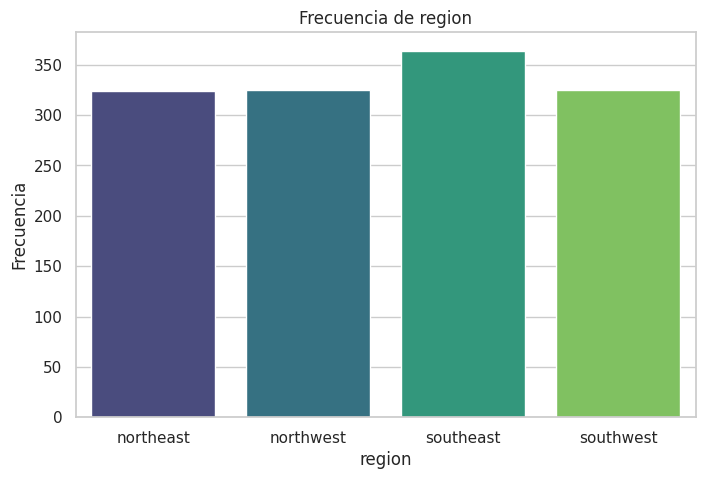

In [50]:
sns.set(style="whitegrid")


categorical_columns = ['sex', 'smoker', 'region']


for column in categorical_columns:
    plt.figure(figsize=(8, 5))


    sns.countplot(data=df, x=column, palette='viridis')

    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

    plt.show()


#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  


*La variable más correlacionada con 'charges' es 'age' con un coeficiente de correlación de .30
La segunda variable más correlacionada es 'bmi' con un coeficiente de correlación de .20
'Children' está débilmente correlacionada con 'charges'.*

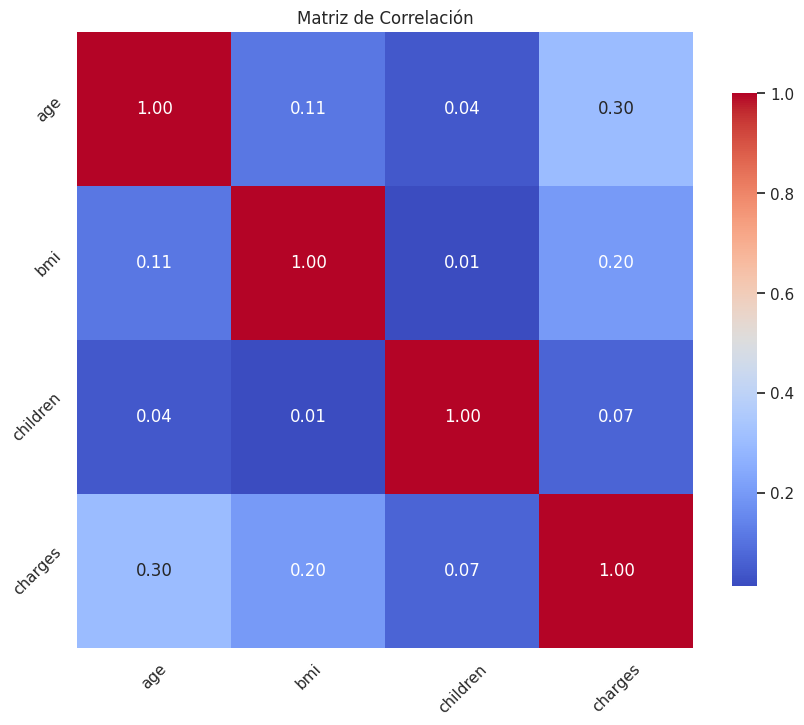

In [51]:
correlation_matrix = df[['age', 'bmi', 'children', 'charges']].corr()

# Configuración del mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Títulos y etiquetas
plt.title('Matriz de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB
None


In [53]:
null_values = df.isnull().sum()

# Imprimir el resultado de la validación
if null_values.sum() > 0:
    print("\nValores nulos encontrados en las siguientes columnas:")
    print(null_values[null_values > 0])
else:
    print("\nNo se encontraron valores nulos en el DataFrame.")


No se encontraron valores nulos en el DataFrame.


In [54]:
from sklearn.impute import SimpleImputer

df = pd.DataFrame(df)

# Imprimir el DataFrame original
print("DataFrame original:")
print(df)

# Definir imputadores para columnas numéricas y categóricas
numeric_imputer = SimpleImputer(strategy='mean')  # Para columnas numéricas
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Para columnas categóricas

# Imputar valores faltantes en columnas numéricas
df['age'] = numeric_imputer.fit_transform(df[['age']])
df['bmi'] = numeric_imputer.fit_transform(df[['bmi']])
df['charges'] = numeric_imputer.fit_transform(df[['charges']])

# Imprimir el DataFrame después de la imputación
print("\nDataFrame después de manejar valores faltantes:")
print(df)

DataFrame original:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

DataFrame después de manejar valores faltantes:
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900        

In [55]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame(df)

# Imprimir el DataFrame original
print("DataFrame original:")
print(df)


# Crear el codificador OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar los datos
encoded_data = encoder.fit_transform(df)

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Imprimir el DataFrame codificado
print("\nDataFrame codificado:")
print(encoded_df)

DataFrame original:
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900         0    yes  southwest  16884.92400
1     18.0    male  33.770         1     no  southeast   1725.55230
2     28.0    male  33.000         3     no  southeast   4449.46200
3     33.0    male  22.705         0     no  northwest  21984.47061
4     32.0    male  28.880         0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970         3     no  northwest  10600.54830
1334  18.0  female  31.920         0     no  northeast   2205.98080
1335  18.0  female  36.850         0     no  southeast   1629.83350
1336  21.0  female  25.800         0     no  southwest   2007.94500
1337  61.0  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

DataFrame codificado:
      age_18.0  age_19.0  age_20.0  age_21.0  age_22.0  age_23.0  age_24.0  \
0          0.0       1.0       0.0    

In [56]:
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame(df)

# Imprimir el DataFrame original
print("DataFrame original:")
print(df)

# Crear el escalador StandardScaler
scaler = StandardScaler()

# Seleccionar solo las columnas numéricas para estandarizar
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Ajustar y transformar los datos numéricos
scaled_data = scaler.fit_transform(df[numeric_columns])

# Convertir el resultado a un DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Imprimir el DataFrame estandarizado
print("\nDataFrame estandarizado:")
print(scaled_df)

DataFrame original:
       age     sex     bmi  children smoker     region      charges
0     19.0  female  27.900         0    yes  southwest  16884.92400
1     18.0    male  33.770         1     no  southeast   1725.55230
2     28.0    male  33.000         3     no  southeast   4449.46200
3     33.0    male  22.705         0     no  northwest  21984.47061
4     32.0    male  28.880         0     no  northwest   3866.85520
...    ...     ...     ...       ...    ...        ...          ...
1333  50.0    male  30.970         3     no  northwest  10600.54830
1334  18.0  female  31.920         0     no  northeast   2205.98080
1335  18.0  female  36.850         0     no  southeast   1629.83350
1336  21.0  female  25.800         0     no  southwest   2007.94500
1337  61.0  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

DataFrame estandarizado:
           age       bmi  children   charges
0    -1.438764 -0.453320 -0.908614  0.298584
1    -1.509965  0.50962

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?

*Lasso Regression tiene un mejor R².*
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

*Las variables sex_male y smoker_yes tienen coeficientes cercanos a cero en Lasso, lo que indica que no son importantes para predecir el objetivo.*

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df = pd.DataFrame(df)


X = df.drop('charges', axis=1)
y = df['charges']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['age', 'bmi', 'children']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'region'])
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', Ridge(alpha=1.0))])
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)


ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', Lasso(alpha=0.1))])
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)


lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)


ridge_coefficients = pd.DataFrame(ridge_model.named_steps['model'].coef_,
                                   columns=['Coefficient'])
ridge_coefficients['Feature'] = (preprocessor.transformers_[0][1].get_feature_names_out(['age', 'bmi', 'children']).tolist() +
                                  list(preprocessor.transformers_[1][1].get_feature_names_out(['sex', 'smoker', 'region'])))

lasso_coefficients = pd.DataFrame(lasso_model.named_steps['model'].coef_,
                                   columns=['Coefficient'])
lasso_coefficients['Feature'] = (preprocessor.transformers_[0][1].get_feature_names_out(['age', 'bmi', 'children']).tolist() +
                                  list(preprocessor.transformers_[1][1].get_feature_names_out(['sex', 'smoker', 'region'])))


print("Ridge Regression:")
print(f"MSE: {ridge_mse}, R²: {ridge_r2}")
print("Coefficients:")
print(ridge_coefficients)

print("\nLasso Regression:")
print(f"MSE: {lasso_mse}, R²: {lasso_r2}")
print("Coefficients:")
print(lasso_coefficients)

Ridge Regression:
MSE: 33619947.00761633, R²: 0.7834446266673822
Coefficients:
     Coefficient           Feature
0     256.879290               age
1     336.999685               bmi
2     425.415706          children
3       7.303107        sex_female
4      -7.303107          sex_male
5  -11791.442825         smoker_no
6   11791.442825        smoker_yes
7     458.265841  region_northeast
8      86.984483  region_northwest
9    -194.922092  region_southeast
10   -350.328233  region_southwest

Lasso Regression:
MSE: 33597180.23026738, R²: 0.7835912737744484
Coefficients:
     Coefficient           Feature
0     256.974491               age
1     337.091872               bmi
2     425.211923          children
3      18.147343        sex_female
4      -0.000000          sex_male
5  -23650.499847         smoker_no
6       0.000000        smoker_yes
7     684.162266  region_northeast
8     313.323152  region_northwest
9      26.074001  region_southeast
10   -125.241235  region_southwest


#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  


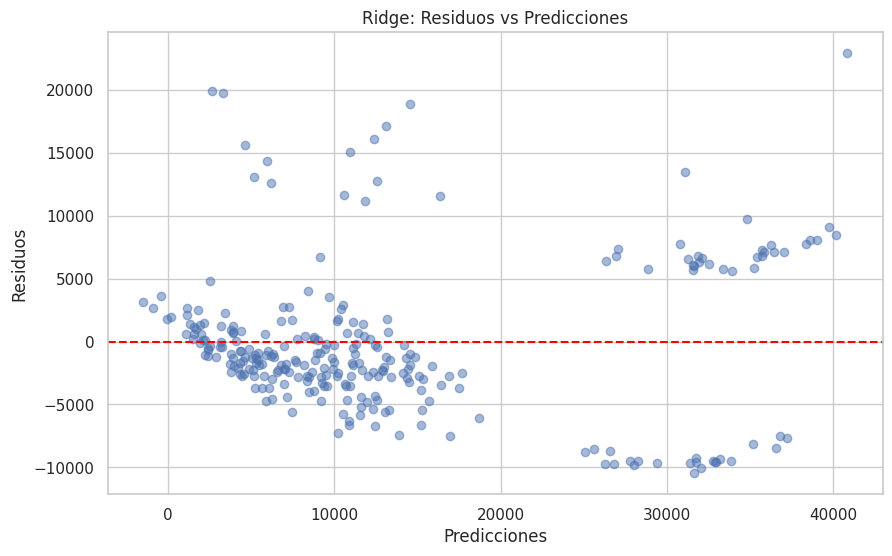

In [59]:
# Obtener residuos para Ridge
ridge_residuals = y_test - ridge_predictions

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(ridge_predictions, ridge_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Ridge: Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

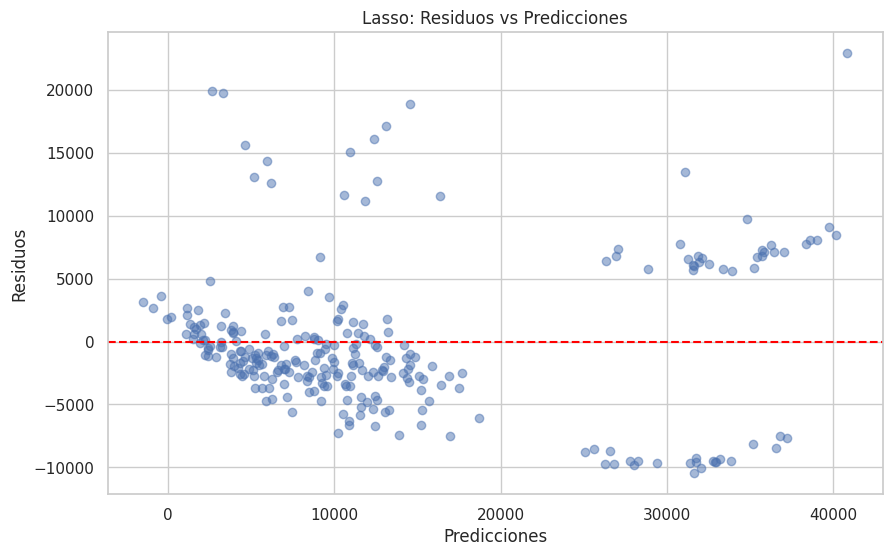

In [60]:
# Obtener residuos para Lasso
lasso_residuals = y_test - lasso_predictions

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(ridge_predictions, ridge_residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Lasso: Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

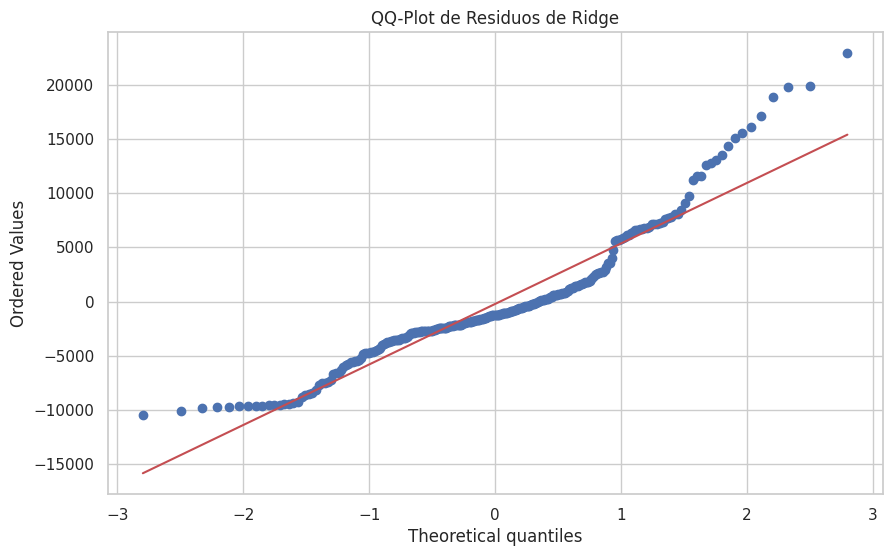

Shapiro-Wilk Test para Ridge: Estadístico=0.9133210863716774, p-value=2.439324396832792e-11


In [61]:
import scipy.stats as stats

# QQ-Plot para Ridge
plt.figure(figsize=(10, 6))
stats.probplot(ridge_residuals, dist="norm", plot=plt)
plt.title('QQ-Plot de Residuos de Ridge')
plt.show()

# Test de Shapiro-Wilk
shapiro_test_ridge = stats.shapiro(ridge_residuals)
print(f"Shapiro-Wilk Test para Ridge: Estadístico={shapiro_test_ridge.statistic}, p-value={shapiro_test_ridge.pvalue}")

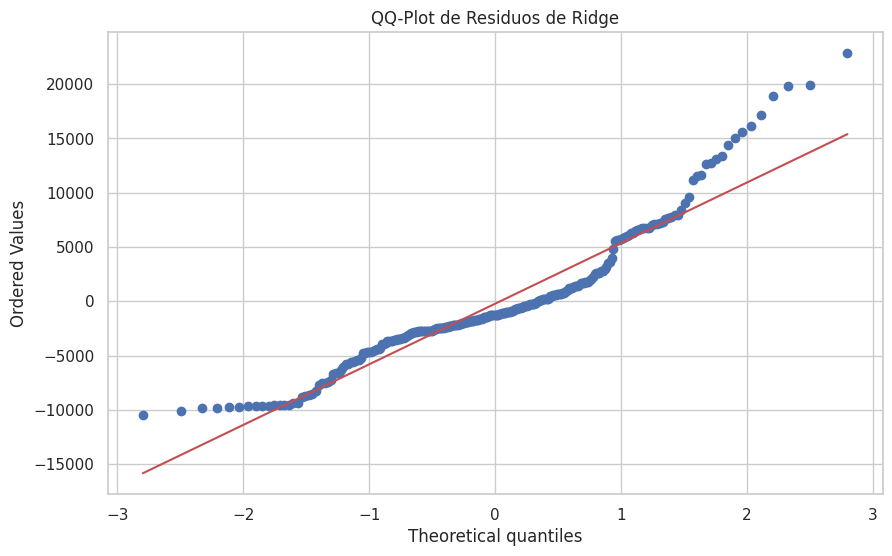

Shapiro-Wilk Test para Ridge: Estadístico=0.9139208528941496, p-value=2.7197183033445568e-11


In [62]:

# QQ-Plot para Lasso
plt.figure(figsize=(10, 6))
stats.probplot(lasso_residuals, dist="norm", plot=plt)
plt.title('QQ-Plot de Residuos de Lasso')
plt.show()

# Test de Shapiro-Wilk
shapiro_test_ridge = stats.shapiro(lasso_residuals)
print(f"Shapiro-Wilk Test para Ridge: Estadístico={shapiro_test_ridge.statistic}, p-value={shapiro_test_ridge.pvalue}")

In [69]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Ajustar el modelo para obtener los residuos
X_train_with_const = sm.add_constant(preprocessor.fit_transform(X_train))
ridge_model_sm = sm.OLS(y_train, X_train_with_const).fit()

# Test de Breusch-Pagan
bp_test = het_breuschpagan(ridge_model_sm.resid, ridge_model_sm.model.exog)
bp_results = dict(zip(['LM Statistic', 'LM Test p-value', 'F Statistic', 'F Test p-value'], bp_test))
print("Breusch-Pagan Test para Ridge:")
print(bp_results)

print()

# Calcular VIF
X_train_with_const = sm.add_constant(preprocessor.fit_transform(X_train))
vif_data = pd.DataFrame()
vif_data["Variable"] = range(X_train_with_const.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const, i) for i in range(X_train_with_const.shape[1])]

print("VIF para Ridge:")
print(vif_data)

Breusch-Pagan Test para Ridge:
{'LM Statistic': np.float64(93.34462547583682), 'LM Test p-value': np.float64(3.675952853872015e-15), 'F Statistic': np.float64(12.675741389089724), 'F Test p-value': np.float64(1.653865974774537e-17)}

VIF para Ridge:
    Variable       VIF
0          0  0.000000
1          1  1.023084
2          2  1.094986
3          3  1.005643
4          4       inf
5          5       inf
6          6       inf
7          7       inf
8          8       inf
9          9       inf
10        10       inf
11        11       inf


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [70]:
bp_test = het_breuschpagan(lasso_model_sm.resid, lasso_model_sm.model.exog)
bp_results = dict(zip(['LM Statistic', 'LM Test p-value', 'F Statistic', 'F Test p-value'], bp_test))
print("Breusch-Pagan Test para Lasso:")
print(bp_results)

print()

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = range(X_train_with_const.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const, i) for i in range(X_train_with_const.shape[1])]

print("VIF para Lasso:")
print(vif_data)

Breusch-Pagan Test para Lasso:
{'LM Statistic': np.float64(93.34462547583682), 'LM Test p-value': np.float64(3.675952853872015e-15), 'F Statistic': np.float64(12.675741389089724), 'F Test p-value': np.float64(1.653865974774537e-17)}

VIF para Lasso:
    Variable       VIF
0          0  0.000000
1          1  1.023084
2          2  1.094986
3          3  1.005643
4          4       inf
5          5       inf
6          6       inf
7          7       inf
8          8       inf
9          9       inf
10        10       inf
11        11       inf


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  

*Linealidad: Ambos modelos, Lasso y Ridge, suponen que la relación entre las variables independientes y la variable dependiente es lineal.
Se espera que los residuos sigan una distribución normal.
La varianza de los residuos es constante a lo largo de todos los niveles de las variables independientes.
Los errores deben ser independientes entre sí.
Ausencia de Multicolinealidad*

- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

Si se detecta heterocedasticidad en los residuos, se pueden considerar las siguientes estrategias:

*Transformaciones de Variables: Aplicar transformaciones como logarítmica o raíz cuadrada a la variable dependiente puede ayudar a estabilizar la varianza.*


#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  

*Modelo más interpretable: Lasso.
Lasso tiende a reducir algunos coeficientes a cero, lo que significa que elimina variables irrelevantes del modelo*

- ¿Cuál reduce mejor el sobreajuste?  

*Modelo que reduce mejor el sobreajuste: Lasso.
Porque elimina variables irrelevantes y simplificar el modelo. Esto es útil en conjuntos de datos con muchas características.*

- ¿Qué variables son más importantes en cada caso?  

Lasso Regression:

*Las variables que tienen coeficientes no cero en el modelo Lasso son las más importantes. Por ejemplo, si smoker_yes tiene un coeficiente alto, indica que es una variable importante en la predicción.
En Ridge, todas las variables están incluidas, y los coeficientes son más pequeños en comparación con Lasso. Las variables con coeficientes más grandes son las más importantes. Puede ser más difícil identificar cuáles son realmente significativas.*
